In [ ]:
# If you need to download the dataset
# import os
# os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
# os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")


In [3]:
from casatasks import tclean

tclean(vis='sis14_twhya_calibrated_flagged.ms', imagename='first_image',
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000,
       interactive=False, savemodel='modelcolumn')

print("complete")


complete


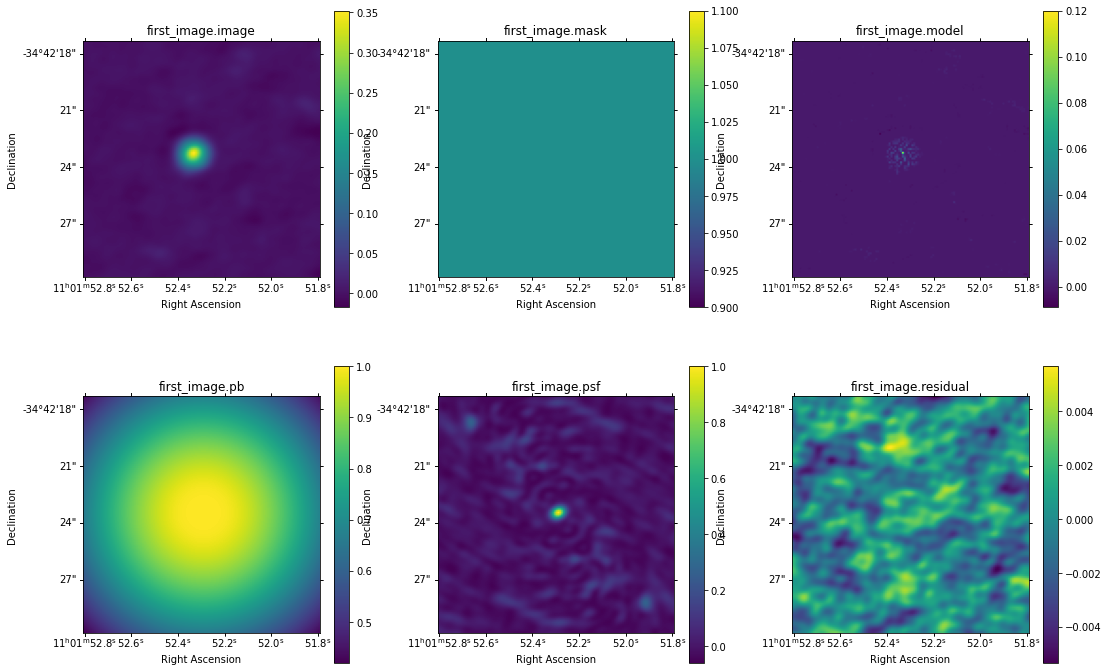

In [4]:
import numpy as np
from casatools import image as IA
from astropy.wcs import WCS
import matplotlib.pyplot as plt

filenames = ['first_image.image', 'first_image.mask', 'first_image.model',
             'first_image.pb', 'first_image.psf', 'first_image.residual']

ia = IA()

def buildImage(imname='', chan=0):
    ia.open(imname)
    pix = ia.getchunk()[:,:,0,chan]
    csys = ia.coordsys()
    ia.close()
    
    rad = 180 / np.pi
    w = WCS(naxis=2)
    w.wcs.crpix = csys.referencepixel()['numeric'][0:2]
    w.wcs.cdelt = csys.increment()['numeric'][0:2] * rad
    w.wcs.crval = csys.referencevalue()['numeric'][0:2] * rad
    w.wcs.ctype = ['RA---SIN', 'DEC--SIN']
    
    return pix, w

plt.subplots(2, 3, figsize=(18, 12))
for ii, name in enumerate(filenames):
    pix, w = buildImage(name)
    # project in WCS
    ax = plt.subplot(2, 3, ii+1, projection=w)
    p1 = int(pix.shape[0] * 0.25)
    p2 = int(pix.shape[0] * 0.75)
    
    im = ax.imshow(pix[p1:p2, p1:p2].transpose(), origin='lower', cmap=plt.cm.viridis)
    plt.colorbar(im, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
